In [5]:
import numpy;
import matplotlib.pyplot as plt;

import tensorflow;
from tensorflow.keras.initializers import TruncatedNormal;

import tqdm;

In [3]:
# Training data
feature = numpy.array(
    [
        [0.08, 0.72], [0.26, 0.58], [0.45, 0.15], 
        [0.60, 0.30], [0.10, 1.0], [0.35, 0.95], 
        [0.70, 0.65], [0.92, 0.45]
    ]);

label = numpy.array([1, 1, 1, 1, -1, -1, -1, -1]);

In [ ]:
class AdalineLMS:

    # Hyperparameters
    def __init__(self):
        
        self.learning_rate = 1e-1;
        self.epoch = 200;

        # Weight initial
        self.weight_x1 = TruncatedNormal(mean = 1.0, stddev = 0.2);
        self.weight_x2 = TruncatedNormal(mean = 1.0, stddev = 0.2);

        # Bias just in case
        self.bias = TruncatedNormal(mean = 1.0, stddev = 0.2);

    # Mean Squared Error
    def _mse(self, prediction, actual):
        return numpy.mean((actual - prediction) ** 2);

    def forward(self, feature, ground_truth):
        predictions = [];

        for i in feature:
            prediction = (self.weight_x1 * i[0]) + (self.weight_x2 * i[1]);

            predictions.append(prediction);

        loss = self._mse(prediction, ground_truth);

        return loss;


    def train(self, feature, label):
        
        # Loop 200 epochs
        for i in range(200):
            
            for f in tqdm(range(len(feature))):
                


In [20]:
# Hyperparameters
learning_rate = 1e-1;
epochs = 200;

X_bias = numpy.c_[numpy.ones(feature.shape[0]), feature];
weights = numpy.random.default_rng().random(feature.shape[1]);

In [21]:
for i in weights:
    print(i)

0.7749415001006587
0.8091029107408839


In [29]:
# Function to calculate net input
def net_input(X, weights):
    return numpy.dot(X, weights)

def net_input_without_style(X, weights):
    lala = [];

    for i in X:
        y_pred = (i[0] * weights[0]) + (i[1] * weights[1]);
        lala.append(y_pred);

    return lala;

# Function to calculate MSE
def mean_squared_error(y_true, y_pred):
    return numpy.mean((y_true - y_pred) ** 2)

In [28]:
for i in net_input(feature,weights):
    print(i)

0.6445494157414892
0.6707644782558839
0.47008911165642897
0.7076957732826603
0.8865970607509498
1.0398772902390703
1.0683759420520356
1.0770424899260038


In [25]:
weights

array([0.7749415 , 0.80910291])

In [30]:
for i in net_input_without_style(feature, weights):
    print(i);

0.6445494157414892
0.6707644782558839
0.47008911165642897
0.7076957732826603
0.8865970607509498
1.0398772902390703
1.0683759420520356
1.0770424899260038


In [5]:
# Training ADALINE
mse_history = []
for epoch in range(epochs):
    output = net_input(X_bias, weights)
    errors = y - output
    weights += learning_rate * np.dot(X_bias.T, errors)
    mse = mean_squared_error(y, output)
    mse_history.append(mse)

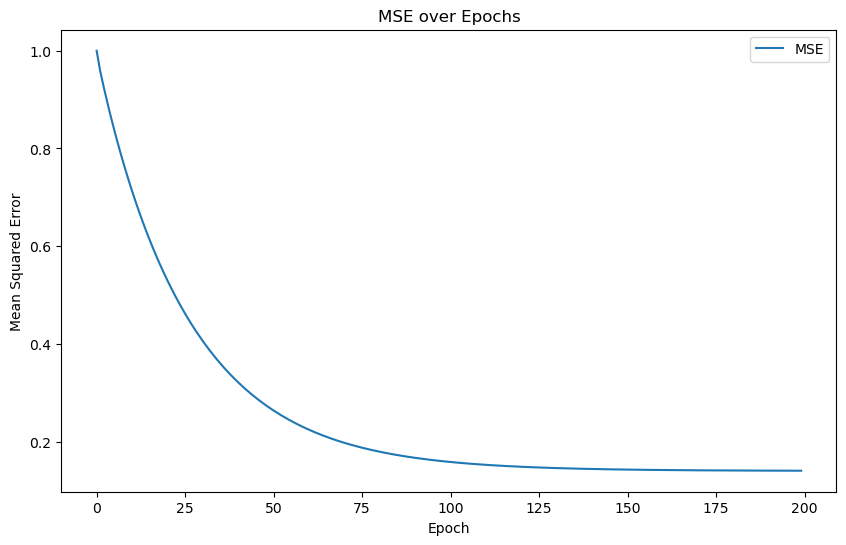

In [6]:
# Plotting MSE curve
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), mse_history, label='MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE over Epochs')
plt.legend()
plt.show()

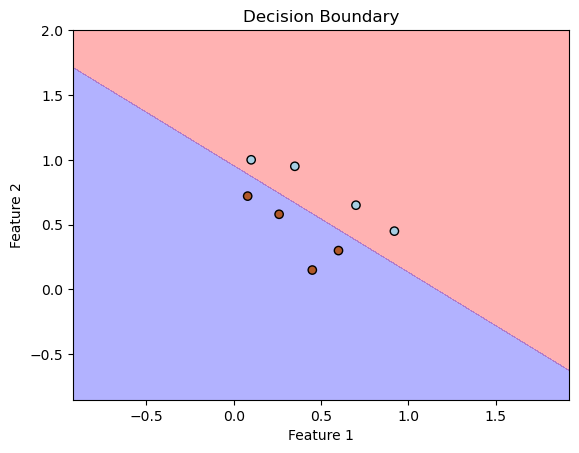

Final weights (including bias): [ 3.45844942 -2.97807657 -3.62045118]


In [7]:
# Plotting decision boundary
def plot_decision_boundary(X, y, weights):
    min_x1, max_x1 = X[:, 0].min() - 1, X[:, 0].max() + 1;
    min_x2, max_x2 = X[:, 1].min() - 1, X[:, 1].max() + 1;
    x1, x2 = np.meshgrid(np.linspace(min_x1, max_x1, 200), np.linspace(min_x2, max_x2, 200));
    Z = net_input(np.c_[np.ones(x1.ravel().shape), x1.ravel(), x2.ravel()], weights).reshape(x1.shape)
    plt.contourf(x1, x2, Z, levels=[-float('inf'), 0, float('inf')], alpha=0.3, colors=['red', 'blue'])
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(X, y, weights)

# Final weights
print("Final weights (including bias):", weights)